<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2002%20-%20Aprendizado%20Supervisionado/Dados%20Desbalanceados/T%C3%B3pico_02_Aprendizado_Supervisionado_Tratando_Dados_Desbalanceados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Dados Desbalanceados

Neste tutorial, vamos explorar como tratar dados desbalanceados em algoritmos de classificação como KNN, Naive Bayes e Árvores de Decisão. Quando estamos trabalhando com dados desbalanceados, onde as classes têm quantidades muito diferentes de exemplos, esses algoritmos podem apresentar problemas de performance, pois acabam atribuindo maior peso à classe majoritária e ignorando a classe minoritária.

Para solucionar esse problema, podemos utilizar técnicas como o ajuste de peso nas classes ou o uso de algoritmos que levem em consideração o desbalanceamento. Uma técnica comum é a utilização de técnicas de reamostragem, como a técnica de oversampling (aumentar a quantidade de amostras da classe minoritária) ou undersampling (reduzir a quantidade de amostras da classe majoritária).

Cada algoritmo de classificação pode ter uma abordagem diferente para lidar com o desbalanceamento. Por exemplo, no KNN podemos utilizar distâncias ponderadas ou matrizes de custo que levem em consideração o desbalanceamento das classes. Já o Naive Bayes pode ser abordado com o uso de técnicas de reamostragem, modelos adaptativos ou a utilização de uma matriz de custo. Por fim, para as Árvores de Decisão, podemos utilizar técnicas como a poda de árvore ou o ajuste de pesos para reduzir a influência da classe majoritária.

Em resumo, é importante considerar técnicas para lidar com o desbalanceamento de dados ao utilizar algoritmos de classificação como KNN, Naive Bayes e Árvores de Decisão. Com a utilização de técnicas de reamostragem, matrizes de custo, pesos nas classes ou modelos adaptativos, podemos obter um melhor desempenho na classificação de amostras em classes desbalanceadas.

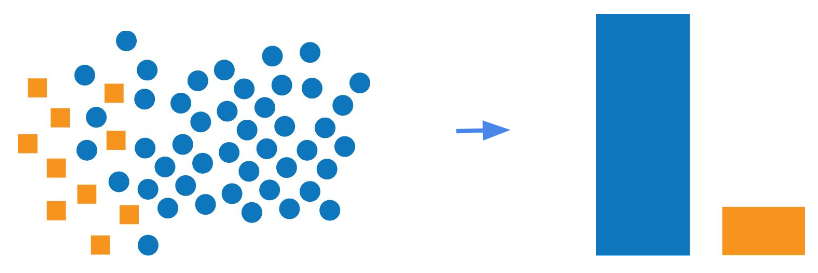

#Inicialização


*   Bibliotecas
*   Parâmetros Globais (Seed...)




In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#Seed (Garante a reproducibilidade)
random_state = 9999

#Função para plotar um dataset 
  * Plot vetores
  * Plot distribuição das Classes
  * Plot distribuição das amostras (3 features)



In [ ]:
def plot_dataset(X,y,dataset_name='Dataset',print_info=True,print_class_dist=True,print_dataset_dist=True):

  #Converto para pandas dataframe para facilitar a manipulação
  df = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3'])
  df['class'] = y

  if print_info:   
    print(f"##### Vetores de Características - {dataset_name} #####")    
    df.info()
    #Shuffle e mostra os primeiros 10 elementos
    print(df.sample(frac = 1).head(10))
    

  if print_class_dist:  
    print("#######################################")  
    # Criando o gráfico de barras com Matplotlib
    counts = df["class"].value_counts()
    plt.figure(figsize=(5,4))
    plt.bar(counts.index, counts.values,color=['red','green','blue'])

    # Adicionando um título e rótulos de eixo
    plt.xlabel("Classes")
    plt.xticks([0,1,2])
    plt.ylabel("#Amostras")
    plt.title(f'Distribuição das Classes - {dataset_name}')
    # Mostrando o gráfico
    plt.show()

  if print_dataset_dist: 
    print("#######################################")
    # Configurando o gráfico
    fig = plt.figure(figsize=(6,8))
    ax = fig.add_subplot(111, projection='3d')

    colors = df['class'].copy()
    colors[colors == 0] = 'red'
    colors[colors == 1] = 'green'
    colors[colors == 2] = 'blue'
    # Plotando os dados
    ax.scatter(df['feature_1'], df['feature_2'],df['feature_3'], c=colors)

    # Configurando as legendas dos eixos
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title(f'Distribuição das Amostras - {dataset_name}')
    # Mostrando o gráfico
    plt.show()
    print("#######################################")

#Pipeline de Treino e Teste

* Cria um dataset e faz a exploração inicial
* Técnica de Validação: Holdout
* Definição do modelo
* Treino
* Teste
* Análise de Performance



##Dataset sintético desbalanceado

##### Vetores de Características - Sintetico - 3 Features - 3 Classes #####
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  3000 non-null   float64
 1   feature_2  3000 non-null   float64
 2   feature_3  3000 non-null   float64
 3   class      3000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 93.9 KB
      feature_1  feature_2  feature_3  class
2831   1.078009   0.991939  -0.967661      1
1851   0.861182  -0.787893  -0.625758      1
2930   0.643680   1.115254   1.044677      0
1651  -1.671474   1.142715   1.144528      0
1698  -0.154876   1.728390   0.167486      0
415   -0.102629   1.773969   0.044695      0
2995  -0.228429   0.852504   1.112262      0
2469  -0.579371   1.733548  -0.023435      0
874   -0.355865  -0.679760   1.000933      2
436   -0.752425   1.298142   0.615454      0
################################

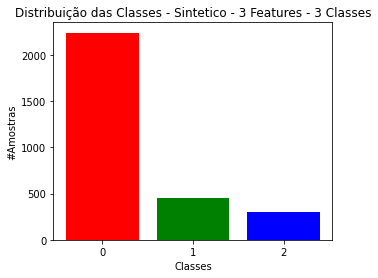

#######################################


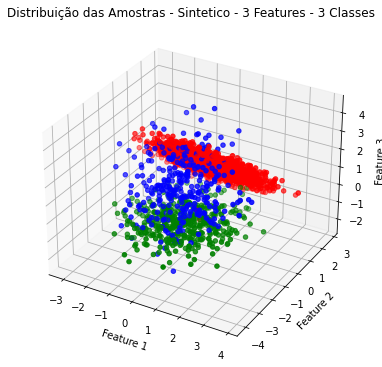

#######################################


In [ ]:
class_weights = [0.75, 0.15 , 0.10]
X, y = make_classification(n_samples=3000, n_features=3, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=1, random_state=random_state)

plot_dataset(X,y,dataset_name='Sintetico - 3 Features - 3 Classes')





##Split Dataset 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=random_state)

## Distribuição das amostras de treino

#######################################


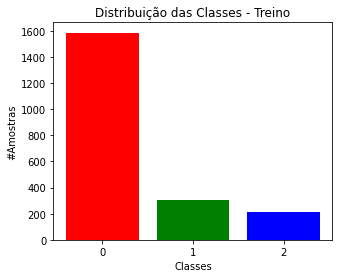

#######################################


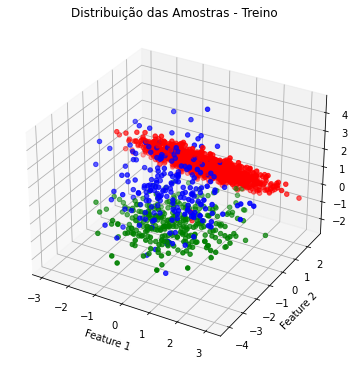

#######################################


In [ ]:
plot_dataset(X_train,y_train,dataset_name='Treino',print_info=False)

##Treinando o Modelo

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Build a Classifier
#model = GaussianNB()
#model = DecisionTreeClassifier()
model = KNeighborsClassifier()

# Model training
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_pred, y_train)

print("Train Accuracy:", accuracy)

Train Accuracy: 0.9709523809523809


##Testando o modelo

#######################################


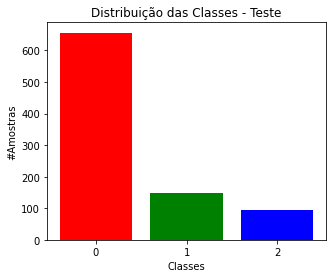

#######################################


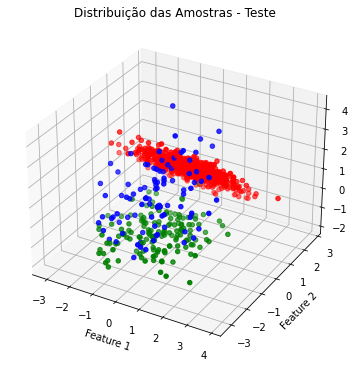

#######################################
Test Accuracy: 0.9611111111111111


In [ ]:
plot_dataset(X_test,y_test,dataset_name='Teste',print_info=False)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print("Test Accuracy:", accuracy)

#Análise dos Resultados

     Perceba que apesar de uma acurácia de 96%, a classe 2 apresenta o pior desepenho. 

##Precision, Recall, F1

In [ ]:
report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       670
           1       0.97      0.90      0.93       160
           2       0.69      0.94      0.80        70

    accuracy                           0.96       900
   macro avg       0.89      0.94      0.91       900
weighted avg       0.97      0.96      0.96       900



##Matriz de Confusão

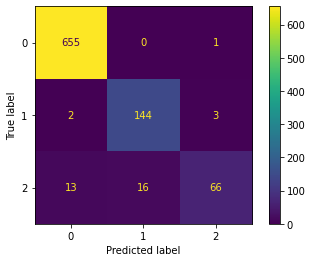

In [ ]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

#Visualizando fronteiras de decisão

Neste exemplo utilizanos o dataset de treino como teste (plot_contours), para computar as fronteiras de decisão do modelo.

Para efeito de visualização, reduziremos para apenas 2 características

(array([0, 1, 2]), array([374,  75,  51]))
Train Accuracy:  0.9571428571428572
Test Accuracy:  0.9266666666666666
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       114
           1       1.00      0.95      0.98        21
           2       0.67      0.67      0.67        15

    accuracy                           0.93       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.93      0.93      0.93       150



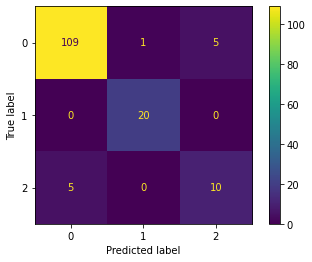

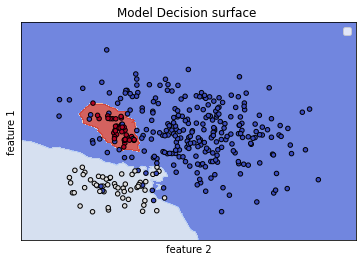

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


class_weights = [0.75, 0.15 , 0.10]
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=1, random_state=random_state)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=random_state)

print(np.unique(y,return_counts=True))

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Build a Classifier
#model = GaussianNB()
#model = DecisionTreeClassifier()
model = KNeighborsClassifier()

model = model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_pred,y_train))

y_pred = model.predict(X_test)    
print("Test Accuracy: ", accuracy_score(y_pred,y_test))


report = classification_report(y_pred, y_test)
print(report)

labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

fig, ax = plt.subplots()
# title for the plots
title = ('Model Decision surface ')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('feature 1')
ax.set_xlabel('feature 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

#Exercício 1: Analise diferentes tipos de desbalanceamentos 
Crie dataset com diferentes distribuições e balanceamentos na função make_classification():

*   Número de amostras (n_samples)
*   Diferentes pesos de classes (class_weights)
*   Overlap entre classes (class_sep e/ou n_clusters_per_class)

Com base no que discutimos sobre os modelos até esta aula, analise criticamente o desempenho. 

Segue abaixo alguns exemplos de datasets:


#######################################


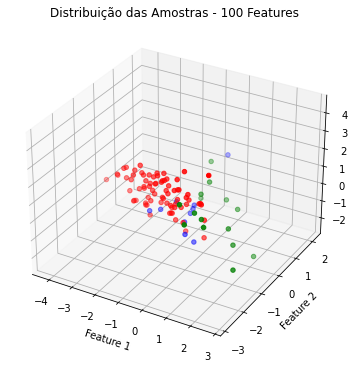

#######################################
#######################################


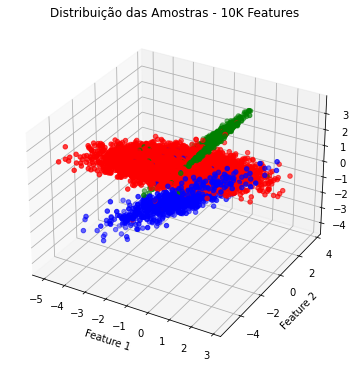

#######################################


In [ ]:
#Número de features
class_weights = [0.75, 0.15 , 0.10]
X, y = make_classification(n_samples=100, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=1, random_state=42)

plot_dataset(X,y,print_info=False,print_class_dist=False,dataset_name='100 Features')


class_weights = [0.75, 0.15 , 0.10]
X, y = make_classification(n_samples=10000, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=1, random_state=42)

plot_dataset(X,y,print_info=False,print_class_dist=False,dataset_name='10K Features')


#######################################


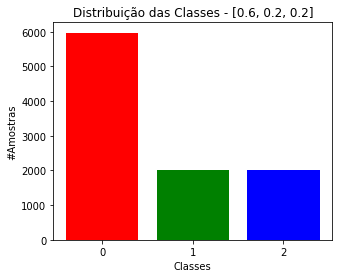

#######################################


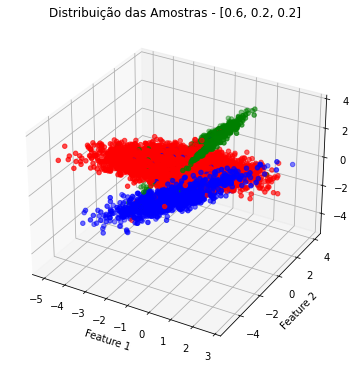

#######################################
#######################################


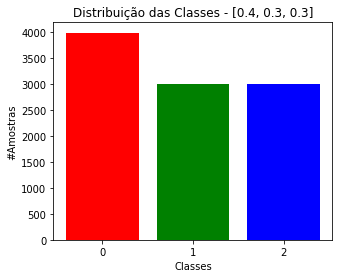

#######################################


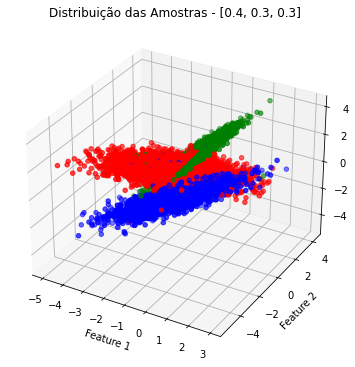

#######################################


In [ ]:
#Distribuição de pesos entre as classes

class_weights = [0.6, 0.2 , 0.2]
X, y = make_classification(n_samples=10000, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=1, random_state=42)

plot_dataset(X,y,print_info=False,print_class_dist=True,dataset_name=str(class_weights))

class_weights = [0.4, 0.3 , 0.3]
X, y = make_classification(n_samples=10000, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=1, random_state=42)

plot_dataset(X,y,print_info=False,print_class_dist=True,dataset_name=str(class_weights))

#######################################


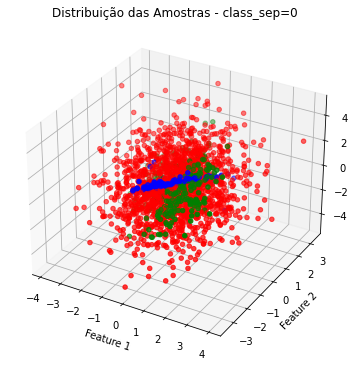

#######################################
#######################################


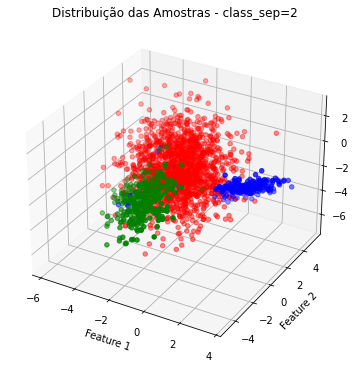

#######################################
#######################################


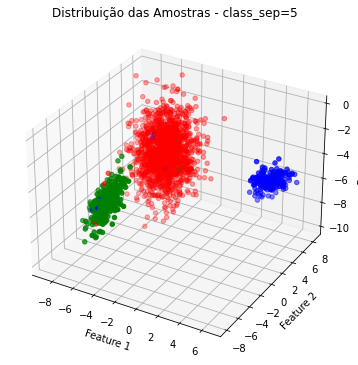

#######################################


In [ ]:
#Overlap entre classes (class_sep(0,2,5))
class_weights = [0.75, 0.15 , 0.10]
X, y = make_classification(n_samples=2000, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=0, random_state=random_state)

plot_dataset(X,y,print_info=False,print_class_dist=False,dataset_name='class_sep=0')


X, y = make_classification(n_samples=2000, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=2, random_state=random_state)

plot_dataset(X,y,print_info=False,print_class_dist=False,dataset_name='class_sep=2')

X, y = make_classification(n_samples=2000, n_features=3, n_informative=3,
                           n_redundant=0, n_clusters_per_class=1, n_classes=3,
                           weights=class_weights, class_sep=5, random_state=random_state)

plot_dataset(X,y,print_info=False,print_class_dist=False,dataset_name='class_sep=5')



